<a href="https://colab.research.google.com/github/rgw3wgs/linearRegression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1. Load ./data/Q1_clean.csv. The data include

Price per night
Review Scores Rating: The average rating for the property
Neighbourhood : The bourough of NYC. Note the space, or rename the variable.
Property Type: The kind of dwelling
Room Type: The kind of space being rented**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
clean = pd.read_csv('Q1_clean.csv')
clean.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


*1. Compute the average prices and scores by Neighbourhood ; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighbourhood.*

In [28]:
clean.loc[:,['Price', 'Neighbourhood '] ].groupby("Neighbourhood ").describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

The most expensive bourough is Manhattan (183 dollars a night)

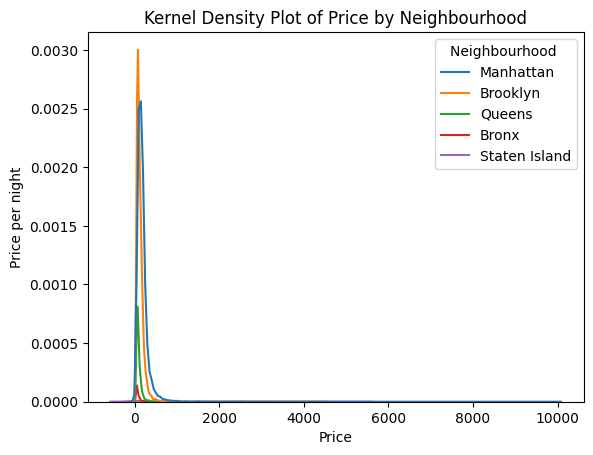

In [29]:
sns.kdeplot(x=clean['Price'], hue=clean['Neighbourhood '])
plt.ylabel('Price per night')
plt.title('Kernel Density Plot of Price by Neighbourhood')

plt.show()

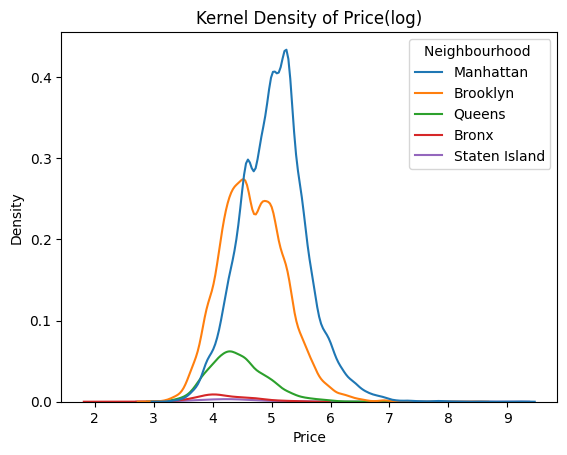

In [30]:
sns.kdeplot(x=np.log(clean['Price']), hue=clean['Neighbourhood '])
plt.title('Kernel Density of Price(log)')
plt.show()

*2. Regress price on Neighbourhood  by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?*

In [31]:
dummy = pd.get_dummies(clean['Neighbourhood '])
X = dummy
y = clean['Price']
model = LinearRegression(fit_intercept=False).fit(X, y)
co = pd.DataFrame({'Neighbourhood ': X.columns, 'Coefficient': model.coef_})
print(co)

  Neighbourhood   Coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


The coefficients are the same as the means from part 1. So, the coefficients in a regression of a continuous variable on one categorical variable are group means.

*3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?*

In [32]:
dummy2 = pd.get_dummies(clean['Neighbourhood '], dtype='int', drop_first = True)
X = dummy2
y = clean['Price']
model = LinearRegression().fit(X,y)

neighbors = clean['Neighbourhood '].unique()

co2 = pd.DataFrame({'Neighbourhood ': X.columns, 'Coefficient':model.coef_})
print(co2)

#intercept
print(model.intercept_)

  Neighbourhood   Coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169
75.27649769585331


The intercept is 75.276. They used the Bronx as the reference category and the coefficients of the dummy variables are the deviation from baseline. You can get the coefficients back from part 2 by adding the regression coefficent values to the intercept.

In [33]:
co3 = pd.DataFrame({'Neighbourhood ': X.columns, 'Coefficient': model.coef_+model.intercept_})
co3

,Neighbourhood,Coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


*4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood . What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?*

In [34]:
# Split the data into features (X) and target (y)
X = clean.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
y = clean['Price']

#Split the sample 80/20 into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

X_train_dummies = pd.get_dummies(X_train, columns=['Neighbourhood '], dtype='int')
X_test_dummies = pd.get_dummies(X_test, columns=['Neighbourhood '], dtype='int')

# Concatenate dummy variables with continuous variable
Z_train = pd.concat([X_train_dummies['Review Scores Rating'], X_train_dummies.drop(columns='Review Scores Rating')],
                    axis=1)
Z_test = pd.concat([X_test_dummies['Review Scores Rating'], X_test_dummies.drop(columns='Review Scores Rating')],
                   axis=1)

#Regression
reg = LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
#R^2
print('The Rsq value is ', reg.score(Z_test,y_test))
#RMSE
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('The RMSE value is ', rmse)
#coefficients
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

The Rsq value is  0.06701086106947296
The RMSE value is  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Neighbourhood _Bronx,-17.261392
2,Neighbourhood _Brooklyn,32.180888
3,Neighbourhood _Manhattan,89.421020
4,Neighbourhood _Queens,4.050208
5,Neighbourhood _Staten Island,61.576393


Based on the data the most expensive property you cant rent is the highest rating in manhattan.


5. split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood  and Room Type. What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [25]:
y = clean['Price']
X = clean.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

 #Split the sample 80/20 into a training and a test set
X_train_dummies = pd.get_dummies(X_train, columns=['Neighbourhood ', 'Room Type'], dtype='int')
X_test_dummies = pd.get_dummies(X_test, columns=['Neighbourhood ', 'Room Type'], dtype='int')

# Concatenate dummy variables with continuous variable
Z_train = pd.concat([X_train_dummies['Review Scores Rating'], X_train_dummies.drop(columns='Review Scores Rating')],
                    axis=1)
Z_test = pd.concat([X_test_dummies['Review Scores Rating'], X_test_dummies.drop(columns='Review Scores Rating')],
                   axis=1)

#Regression
reg = LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat = reg.predict(Z_test)
#R^2
print('The Rsq value is ', reg.score(Z_test,y_test))
#RMSE
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('The RMSE value is ', rmse)
#coefficients
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

The Rsq value is  0.22035348129282306
The RMSE value is  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Neighbourhood _Bronx,-13.022765
2,Neighbourhood _Brooklyn,10.378456
3,Neighbourhood _Manhattan,53.693304
4,Neighbourhood _Queens,-6.833330
5,Neighbourhood _Staten Island,50.003022
6,Room Type_Entire home/apt,110.617820
7,Room Type_Private room,3.101341
8,Room Type_Shared room,-19.500474


Based on the data the most expensive kind of property you can rent is an entire home or apartment in manhattan.

6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

The coefficient on Review Scores Rating decreased from part 4 to part 5. This means that when Neighbourhood and Room Type in addition to Review Scores Rating, the impact of Review Scores Rating on price is reduced.